In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
data_cleaned = pd.read_csv('data_cleaned.csv')

## Зависимость уровня счастья от страны

In [5]:
import pingouin as pg

normality_results = data_cleaned.groupby('cntry')['happy'].apply(pg.normality).reset_index()
print(normality_results)

  cntry level_1         W          pval  normal
0    AT      AT  0.876465  2.929350e-34   False
1    BE      BE  0.866997  3.435172e-31   False
2    CH      CH  0.857489  3.880818e-29   False
3    CY      CY  0.920590  6.067963e-15   False
4    DE      DE  0.883194  2.480258e-36   False
5    ES      ES  0.905547  1.158471e-28   False
6    FI      FI  0.822439  3.338379e-36   False
7    FR      FR  0.920510  1.073854e-25   False
8    GB      GB  0.898691  2.288714e-24   False
9    GR      GR  0.910184  1.560870e-22   False


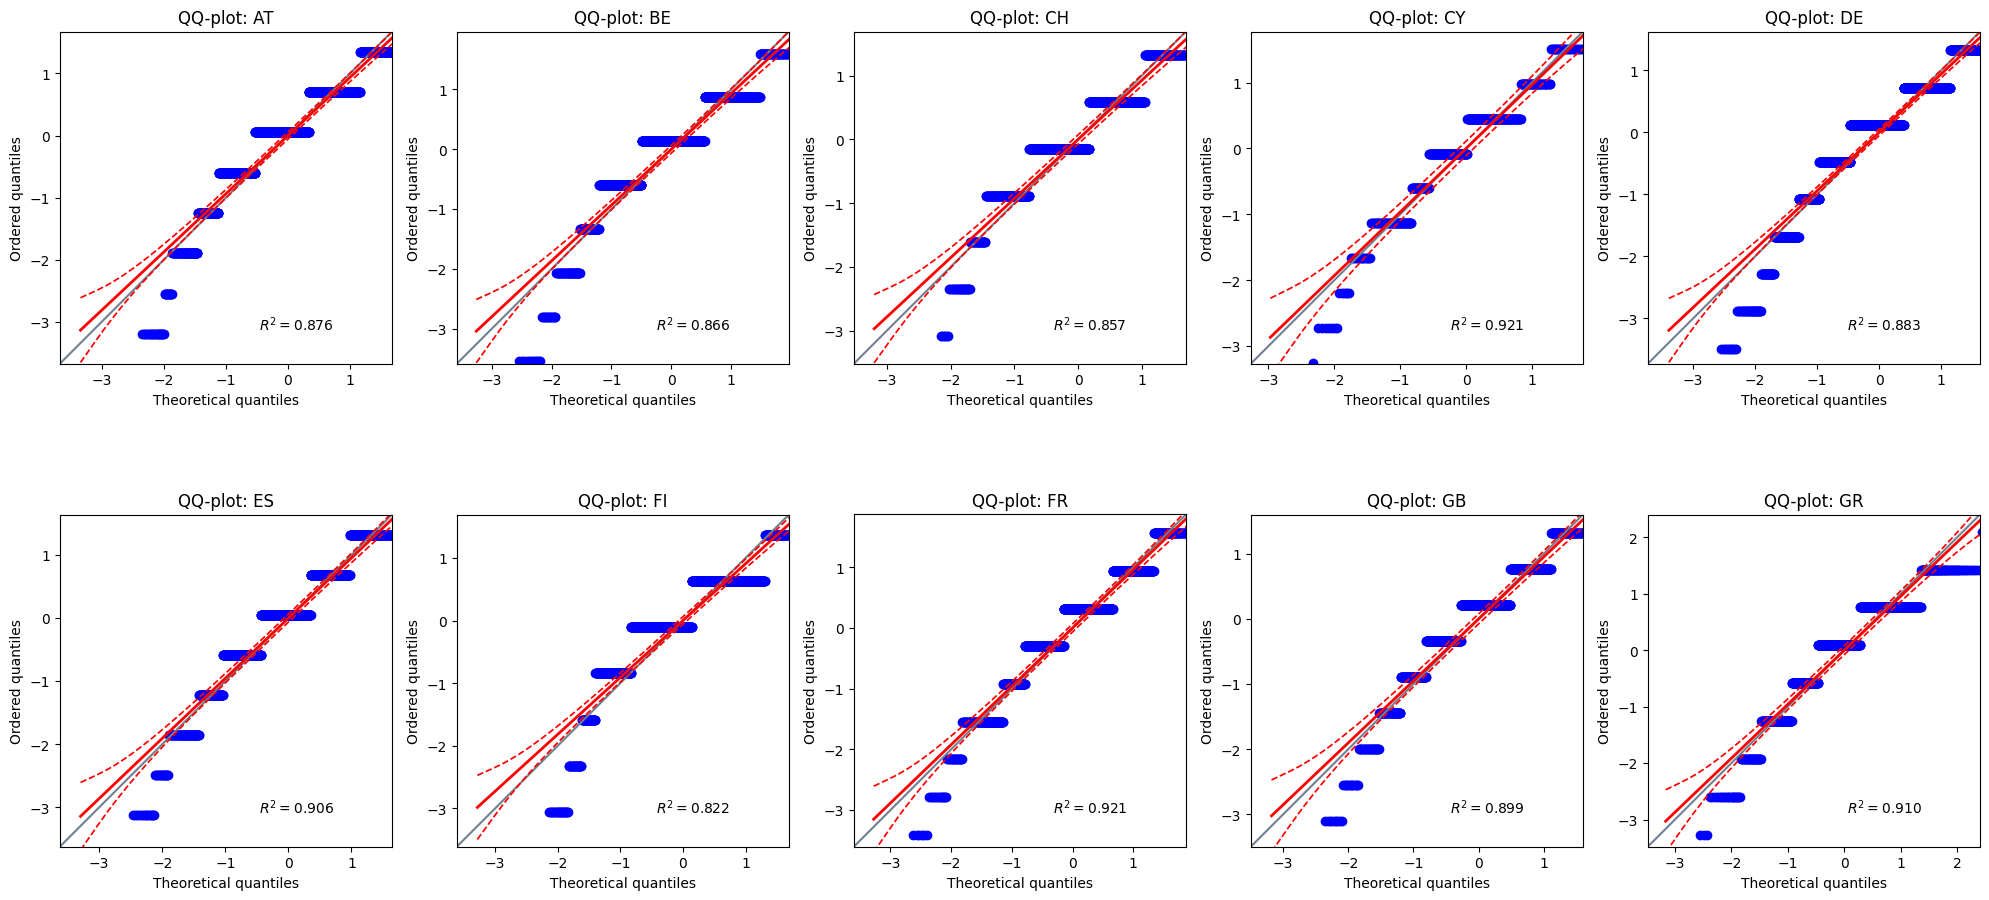

In [60]:
countries = data_cleaned['cntry'].unique()

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()


# Для каждой страны строим QQ-plot
for i, country in enumerate(countries):
    data = data_cleaned[data_cleaned['cntry'] == country]['happy']
    pg.qqplot(data, dist='norm', ax=axes[i])
    axes[i].set_title(f'QQ-plot: {country}')

plt.tight_layout()
plt.show()

По результатам теста и графикам QQ-plot делаем вывод о ненормальности распределения данных в выборках, соответственно для проверки гипотез применим непараметрический тест Kruskal-Wallis.

In [10]:
result = pg.kruskal(data=data_cleaned, dv='happy', between='cntry')

# Вывод с гипотезами
print(
    f"H0: Распределения уровня счастья одинаковы во всех странах.\n"
    f"H1: Распределения уровня счастья различаются хотя бы для одной страны.\n"
    f"Результат: H = {result['H'].values[0]:.2f}, p = {result['p-unc'].values[0]:.3e}\n"
    f"Вывод: {'Отвергаем H0' if result['p-unc'].values[0] < 0.05 else 'Нет оснований отвергнуть H0'}."
)

H0: Распределения уровня счастья одинаковы во всех странах.
H1: Распределения уровня счастья различаются хотя бы для одной страны.
Результат: H = 697.80, p = 2.056e-144
Вывод: Отвергаем H0.


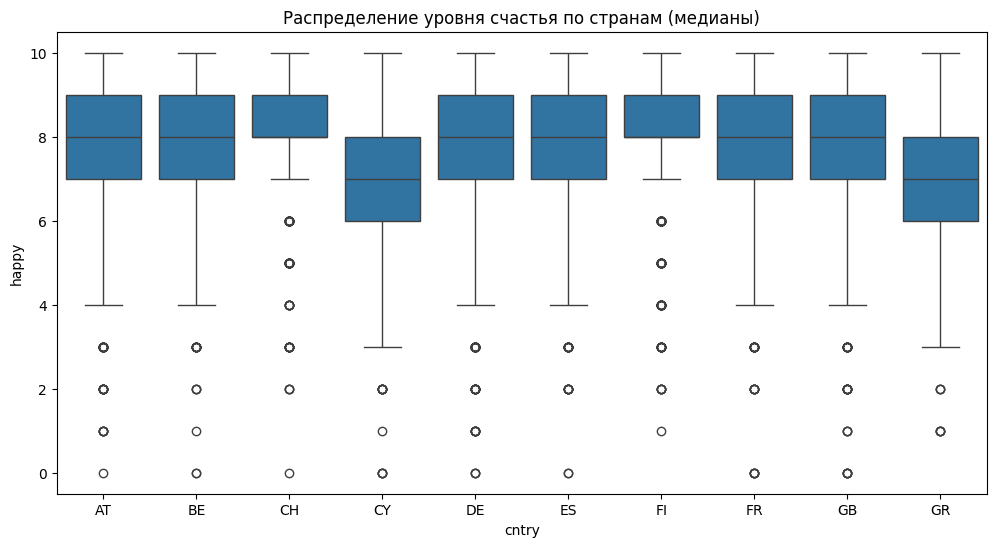

In [11]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data_cleaned, x='cntry', y='happy')

plt.title('Распределение уровня счастья по странам (медианы)')
plt.show()

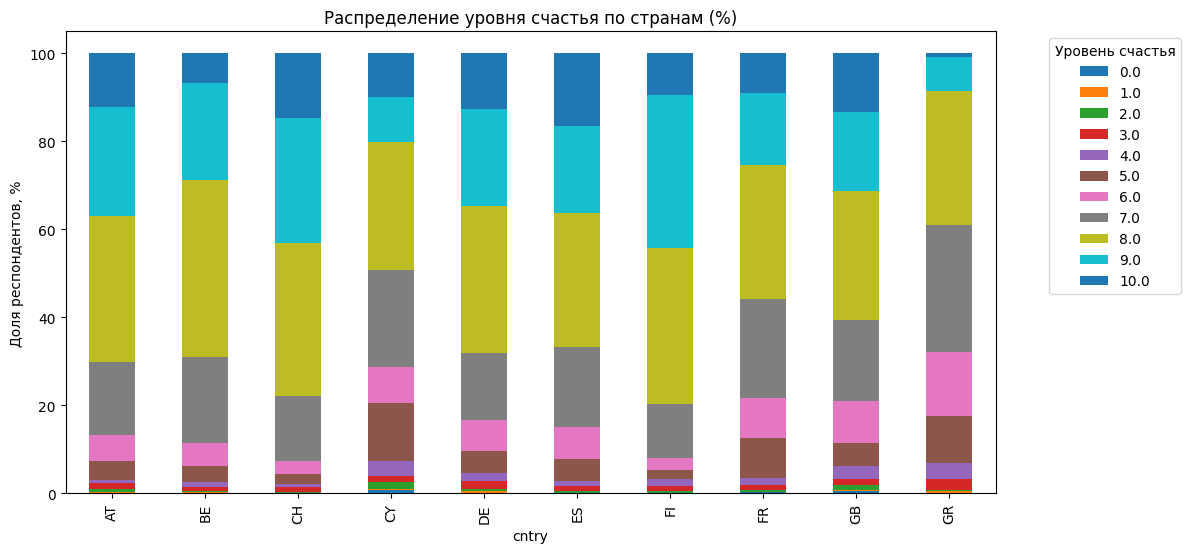

In [12]:
# Построим таблицу сопряженности 
df_crosstab_cntry = pd.crosstab(data_cleaned.cntry, data_cleaned.happy)
df_percent = df_crosstab_cntry.div(df_crosstab_cntry.sum(axis=1), axis=0) * 100  

df_percent.plot(kind='bar', stacked=True, figsize=(12, 6))  
plt.title('Распределение уровня счастья по странам (%)')  
plt.ylabel('Доля респондентов, %')  
plt.legend(title='Уровень счастья', bbox_to_anchor=(1.05, 1))  
plt.show()  

**Вывод**:  Мы получили статистически значимые результаты тестов, что распределение уровня счастья различается хотя бы в одной стране. Как видно из графика в Финляднии и Швейцарии большая часть люди с более высоким уровнем счастья, страны с наименьшим уровнем счастья Греция.

## Зависимость уровня счастья от занятий спортом

In [15]:
normality_results = data_cleaned.groupby('dosprt')['happy'].apply(pg.normality).reset_index()
print(normality_results)

   dosprt  level_1         W          pval  normal
0     0.0      0.0  0.924729  6.402300e-31   False
1     1.0      1.0  0.895441  3.840014e-25   False
2     2.0      2.0  0.891865  2.515014e-31   False
3     3.0      3.0  0.894770  3.267423e-32   False
4     4.0      4.0  0.877717  2.453104e-29   False
5     5.0      5.0  0.875778  1.009866e-29   False
6     6.0      6.0  0.872369  1.527624e-20   False
7     7.0      7.0  0.884854  1.757434e-43   False


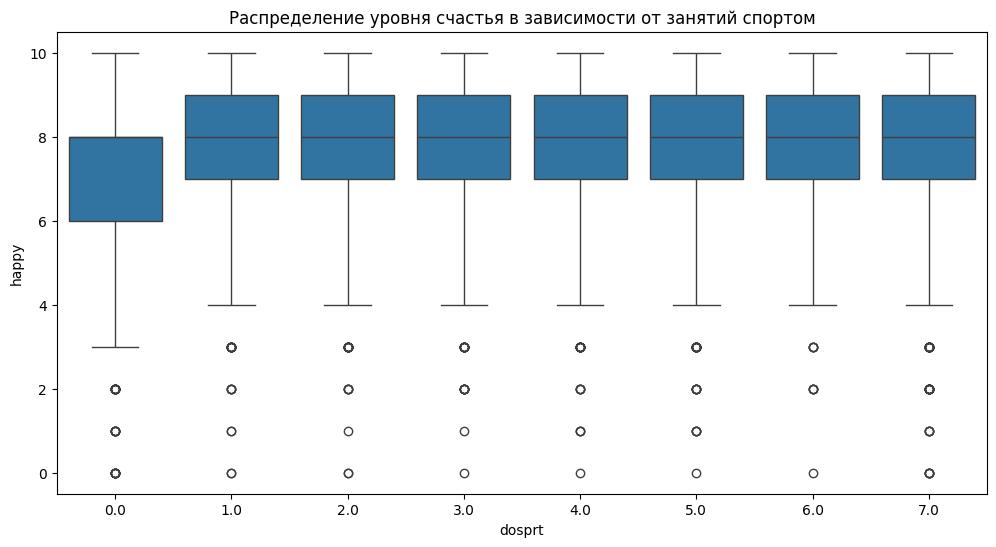

In [16]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data_cleaned, x='dosprt', y='happy')

plt.title('Распределение уровня счастья в зависимости от занятий спортом')
plt.show()

In [33]:
pg.corr(data_cleaned['dosprt'], data_cleaned['happy'], method='spearman')

,n,r,CI95%,p-val,power
spearman,12242,0.135577,"[0.12, 0.15]",2.598121e-51,1.0


Тест Спирмена показал статистическую значимость существования слабой связи, ρ = 0.136. Из графиков боксплотов видно, что распределение для значения 0 (отсутствия занятия спортом) значительно отличается. Проверим гипотезу влияет ли количество занятий спортом в неделю на уровень спорта.

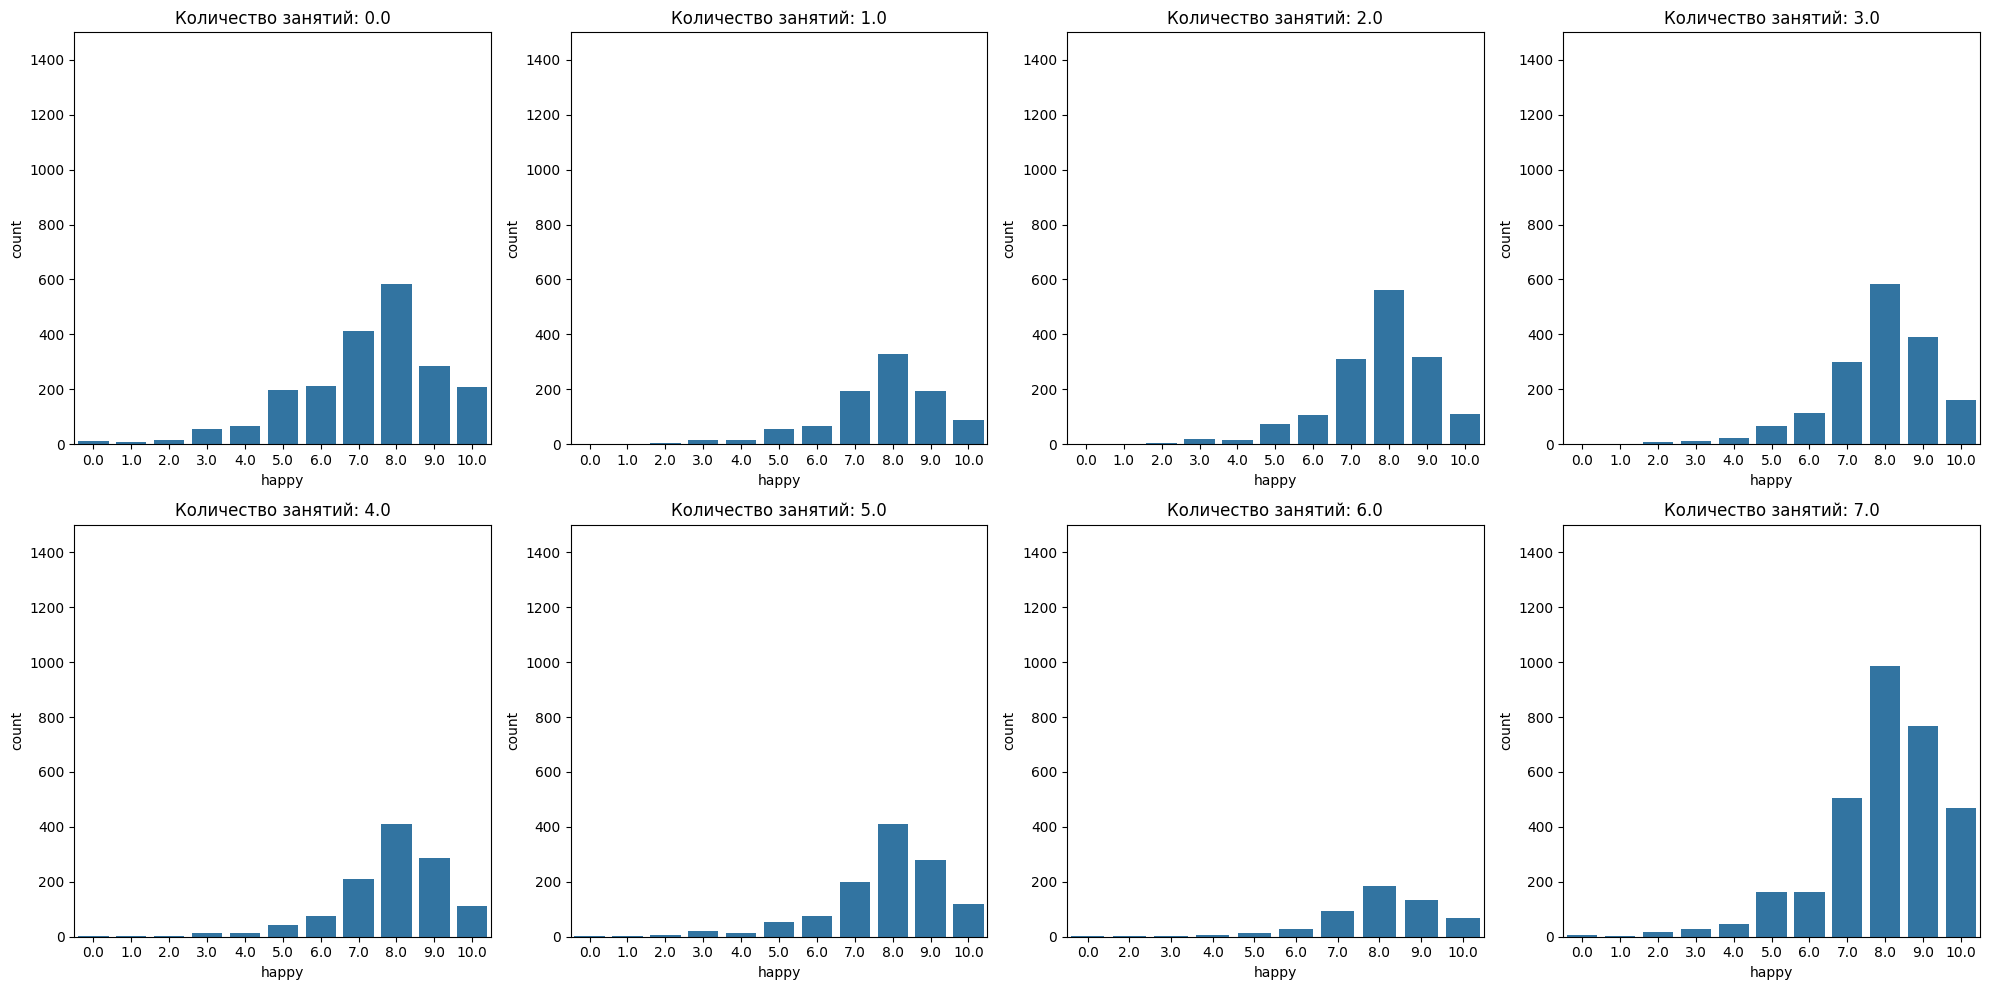

In [ ]:
dosrpt_values = sorted(data_cleaned['dosprt'].unique().astype('object'))

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(dosrpt_values):
    data = data_cleaned[data_cleaned['dosprt'] == col]
    sns.countplot(x ='happy', data=data, ax=axes[i])
    axes[i].set_title(f'Количество занятий: {col}')

    axes[i].set_ylim(0, 1500)

plt.tight_layout()
plt.show()

In [90]:
result = pg.kruskal(data=data_cleaned, dv='happy', between='dosprt')

# Вывод с гипотезами
print(
    f"H0: Распределения уровня счастья одинаковы и не зависимы от количества занятий спортом.\n"
    f"H1: Распределения уровня счастья различаются.\n"
    f"Результат: H = {result['H'].values[0]:.2f}, p = {result['p-unc'].values[0]:.3e}\n"
    f"Вывод: {'Отвергаем H0' if result['p-unc'].values[0] < 0.05 else 'Нет оснований отвергнуть H0'}.")

H0: Распределения уровня счастья одинаковы и не зависимы от количества занятий спортом.
H1: Распределения уровня счастья различаются.
Результат: H = 262.24, p = 6.870e-53
Вывод: Отвергаем H0.


Тест на нормальность показал, что данные распределены не нормально, был проведен непараметрический тест Краскела-Уоллеса, который показал, что распределения уровня счастья различаются хотя бы в одной группе. Тест Спирмена показал слабую положительную связь, статически значимую.

## Зависимость уровня счастья от курения и алкоголя

In [91]:
normality_results = data_cleaned.groupby('alcfreq')['happy'].apply(pg.normality).reset_index()
print(normality_results)

   alcfreq  level_1         W          pval  normal
0      1.0      1.0  0.910377  1.451501e-21   False
1      2.0      2.0  0.872908  1.727714e-40   False
2      3.0      3.0  0.895997  2.292594e-38   False
3      4.0      4.0  0.882924  6.314182e-34   False
4      5.0      5.0  0.882584  6.745413e-27   False
5      6.0      6.0  0.893402  1.895955e-32   False
6      7.0      7.0  0.911183  1.374715e-33   False


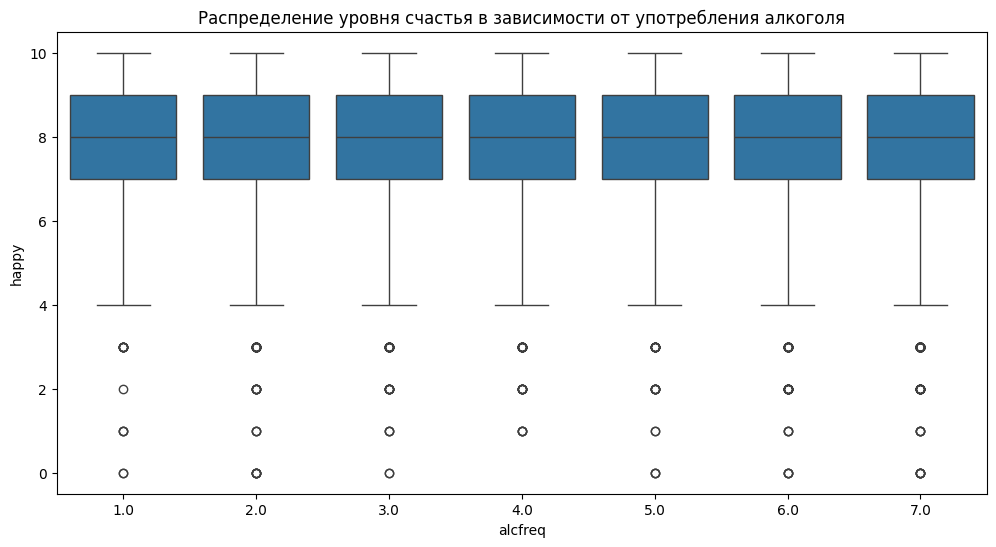

In [93]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data_cleaned, x='alcfreq', y='happy')

plt.title('Распределение уровня счастья в зависимости от употребления алкоголя')
plt.show()

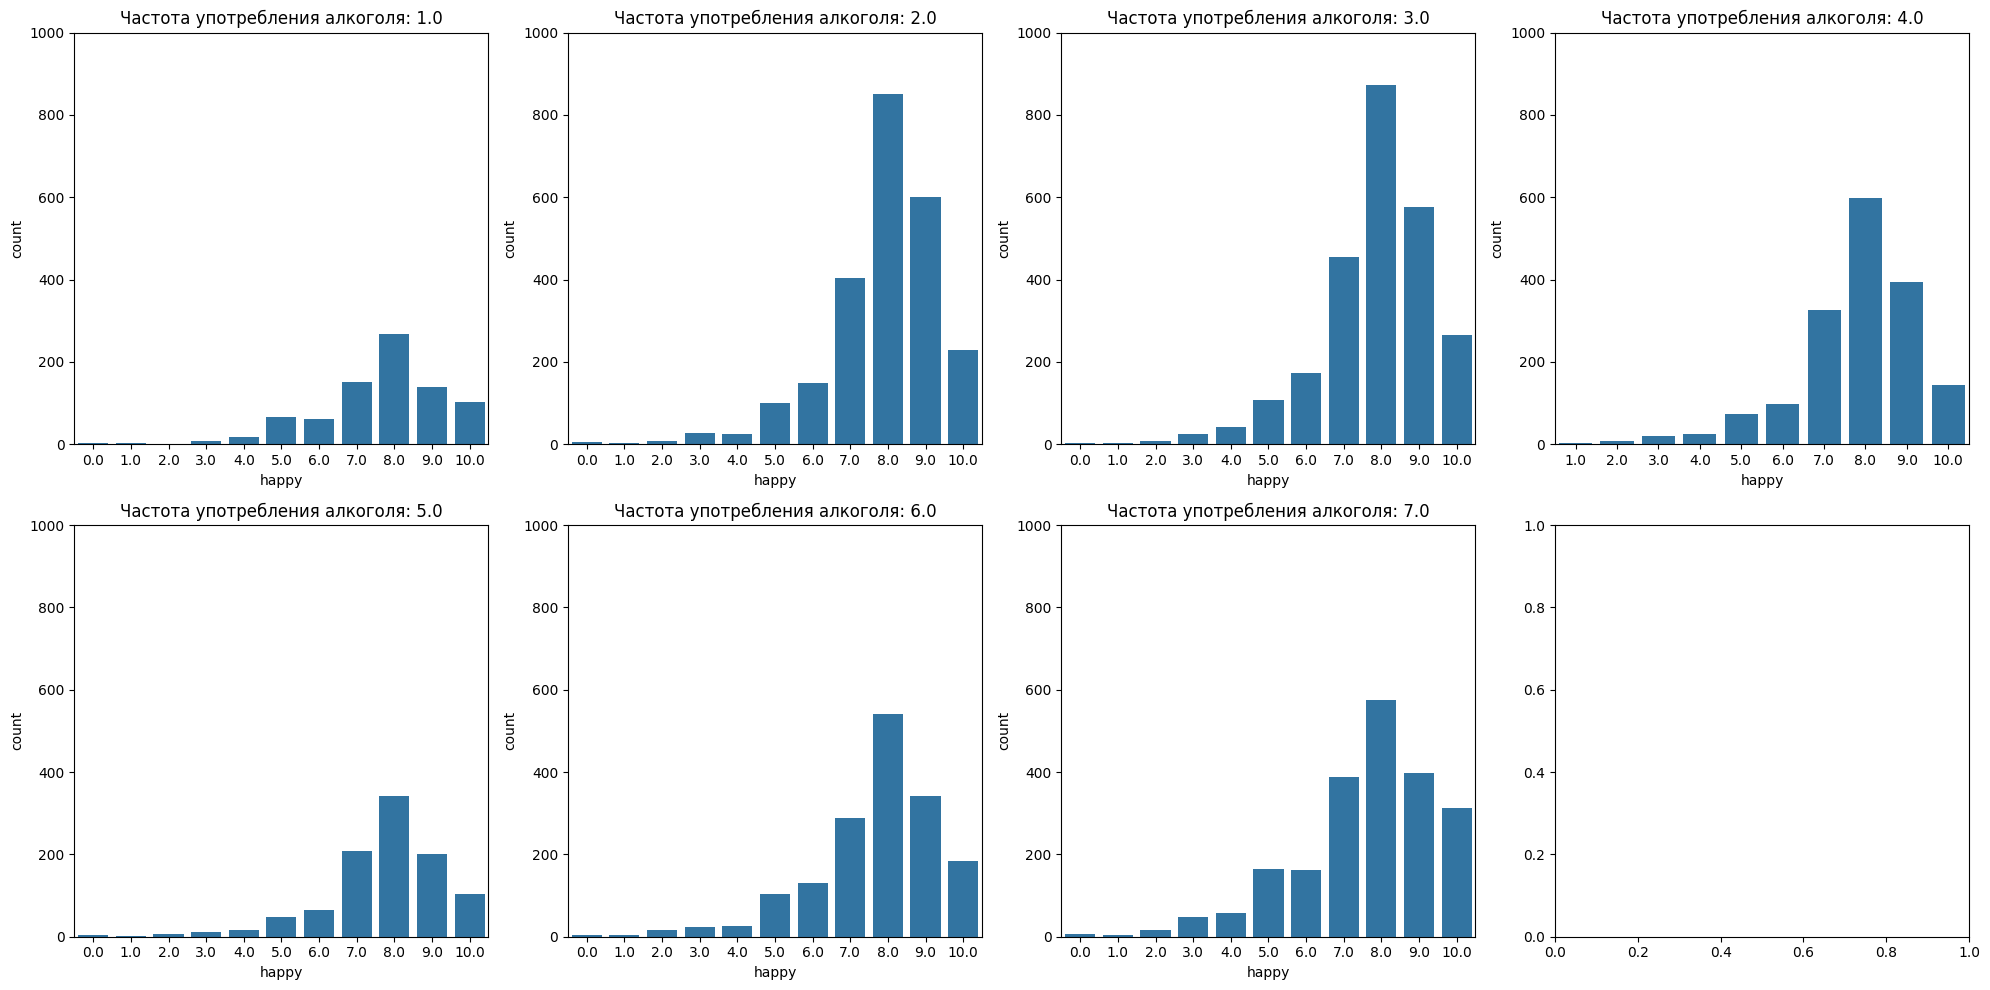

In [100]:
alcfreq_values = sorted(data_cleaned['alcfreq'].unique().astype('object'))

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(alcfreq_values):
    data = data_cleaned[data_cleaned['alcfreq'] == col]
    sns.countplot(x ='happy', data=data, ax=axes[i])
    axes[i].set_title(f'Частота употребления алкоголя: {col}')

    axes[i].set_ylim(0, 1000)

plt.tight_layout()
plt.show()

Наибольшая частота с высоким уровнем счастья у респондентов употребляют от 1 раза в неделю до 2-3 раз за месяц. На графиках медианное значение одинаково во всех группах.

In [101]:
result = pg.kruskal(data=data_cleaned, dv='happy', between='alcfreq')

# Вывод с гипотезами
print(
    f"H0: Распределения уровня счастья одинаковы и не зависимы от частоты употребления алкоголя.\n"
    f"H1: Распределения уровня счастья различаются.\n"
    f"Результат: H = {result['H'].values[0]:.2f}, p = {result['p-unc'].values[0]:.3e}\n"
    f"Вывод: {'Отвергаем H0' if result['p-unc'].values[0] < 0.05 else 'Нет оснований отвергнуть H0'}.")

H0: Распределения уровня счастья одинаковы и не зависимы от частоты употребления алкоголя.
H1: Распределения уровня счастья различаются.
Результат: H = 29.31, p = 5.325e-05
Вывод: Отвергаем H0.


In [102]:
pg.corr(data_cleaned['alcfreq'], data_cleaned['happy'], method='spearman')

,n,r,CI95%,p-val,power
spearman,12242,-0.032119,"[-0.05, -0.01]",0.000379,0.944615


Тест Краскела-Уоллиса показал, что распределение по частоте употребления алкоголя отличается хотя бы в одной группе. Корреляция Спирмена показала обратную слабую связь r = -0.0321,  но статистически значимую. С увеличением значения частоты употребления алкоголя уменьшается уровень счастья. В наших данных значение частоты употребления увеличивается от 1 до 7, где 1- употребление каждый день, а 7  - никогда. 